In [1]:
from utils import *
from nearest_neighbor import *
import matplotlib.pyplot as plt
from HAC_clustering import *

In [5]:
# path_data = "/home/siyuan/thesis/Data/"
# path_sample = "/home/siyuan/thesis/Data/sample90/"
path_data = "/Users/lou/Thesis/BCR_Clone_Identification/Data/"
path_sample = "/Users/lou/Thesis/BCR_Clone_Identification/Data/sample90"

In [4]:
d_to_nearest_all = np.load(path_data+"d_to_nearest_negation.npy")
dis = np.load(path_data+"dis_negation.npy")

## compute tf-idf representation

### For sample90

In [6]:
outfile = path_data+"sample90_Nt_info.csv"

In [7]:
df = pd.read_csv(outfile,sep='\t')
print("All sequence:",df.shape)
df_unique = df.drop_duplicates(subset="V-D-J-REGION", ignore_index=True)
print("Unique V-D-J sequence:",df_unique.shape)

All sequence: (19195, 7)
Unique V-D-J sequence: (19195, 7)


In [8]:
%%time
%pdb
seqs_tf_idf = cal_tf_idf(df.loc[:,"V-D-J-REGION"].values,k=2,atoms=["a","t","c","g"])

Automatic pdb calling has been turned ON
CPU times: user 5.07 s, sys: 120 ms, total: 5.19 s
Wall time: 10.3 s


### For negative table

In [6]:
# neg_file = path_data + "NegationTable/3_Nt-sequences.txt"
# df_neg = pd.read_csv(neg_file,sep='\t')
# neg_seq_file = path_data + "Nt_negation_info.csv"
# read_data(neg_file, neg_seq_file)

In [7]:
neg_seq_file = path_data + "Nt_negation_info.csv"
neg_seq = pd.read_csv(neg_seq_file,sep='\t')

In [8]:
neg_seq

,Sequence number,Sequence ID,V-GENE,J-GENE,V-D-J-REGION,JUNCTION,JUNCTION length
0,18620,18619,Homsap IGHV1-24,Homsap IGHJ5,gggctgaggtgaagaagcctggggcctcagtgaaggtctcctgcaa...,tgcgacccctgg,12
1,60,59,Homsap IGHV3-23D,Homsap IGHJ5,ggaggcttggtacagcctggggagtccctgagactctcctgtgcag...,tgtgcgagcggccacttg,18
2,86,85,Homsap IGHV7-4-1,Homsap IGHJ5,ggtctgagttgaagaagcctggggcctcagtgaaggtttcctgcac...,tgtctgagcgactacaattgg,21
3,108,107,Homsap IGHV7-4-1,Homsap IGHJ5,tctgagttgaagaagcctggggcctcagtgaaggtttcctgcacgg...,tgtctgagcgactacaattgg,21
4,114,113,Homsap IGHV7-4-1,Homsap IGHJ5,ggtctgagttgaagaagcctggggcctcagtgaaggtttcctgcac...,tgtctgagcgactacaattgg,21
...,...,...,...,...,...,...,...
14323,6318,6317,Homsap IGHV1-8,Homsap IGHJ6,gggctgaggtgaagaagcctggggcctcagtgagggtctcctgcaa...,tgtgcgagagggctctctgatccggcccgggatagtgaagtggttc...,87
14324,11526,11525,Homsap IGHV3-30,Homsap IGHJ3,ggggaggcgtggtccagcctgggaggtccctcagactctcctgtgc...,tgtgcgaaggggattcggaggcattacagtgtttggagcgcttata...,90
14325,11525,11524,Homsap IGHV3-30,Homsap IGHJ3,ggaggcgtggtccagcctgggaggtccctcagactctcctgtgcag...,tgtgcgaaggggattcggaggcattacagtgtttggagcgcttata...,90
14326,11527,11526,Homsap IGHV3-30,Homsap IGHJ3,gggaggcgtggtccagcctgggaggtccctcagactctcctgtgca...,tgtgcgaaggggattcggaggcattacagtgtttggagcgcttata...,90


In [9]:
neg_tf_idf = cal_tf_idf(neg_seq.loc[:,"V-D-J-REGION"].values,k=2,atoms=["a","t","c","g"])

## Detect cutoff using negation method

In [10]:
seqs1 = seqs_tf_idf
seqs2 = neg_tf_idf
d_to_nearest_all,dis = dist_to_nearest_all_exhaustive(seqs_tf_idf, neg_tf_idf, distance=Cosine_dist)

19195 sequences, 275011632 calls, use 915.151705 seconds.


In [11]:
np.save(path_data+"d_to_nearest_negation.npy", d_to_nearest_all)
np.save(path_data+"dis_negation.npy", dis)

In [11]:
tolerance = 0.1

In [12]:
cutoff = negation_based_cutoff(d_to_nearest_all, tolerance)
cutoff

0.0028415104603757846

In [13]:
d_to_nearest_all

array([0.00750724, 0.00461375, 0.00675373, ..., 0.00404576, 0.00450822,
       0.00810977])

## Calculate the pairwise distance

In [ ]:
%%time
d_to_nearest_all_samples,dis_samples = dist_to_nearest_all_exhaustive(seqs_tf_idf,distance=Cosine_dist)
d_to_nearest_all_samples

In [16]:
# # open a binary file in write mode
# file = open(path_data+"d_to_nearest_sample90.npy", "wb")
# # save array to the file
# np.save(file, d_to_nearest_all_samples)
# # close the file
# file.close
np.save(path_data+"d_to_nearest_sample90.npy", d_to_nearest_all_samples)
np.save(path_data+"dis_sample90.npy", dis_samples)

In [3]:
d_to_nearest_all_samples = np.load(path_data+"d_to_nearest_sample90.npy")
dis_samples = np.load(path_data+"dis_sample90.npy")

## Clustering

(array([ 326.,    0., 4472.,    0., 7807., 4020., 1906.,  530.,  118.,
          16.]),
 array([-4.44089210e-16, -3.33066907e-16, -2.22044605e-16, -1.11022302e-16,
         0.00000000e+00,  1.11022302e-16,  2.22044605e-16,  3.33066907e-16,
         4.44089210e-16,  5.55111512e-16,  6.66133815e-16]),
 <BarContainer object of 10 artists>)

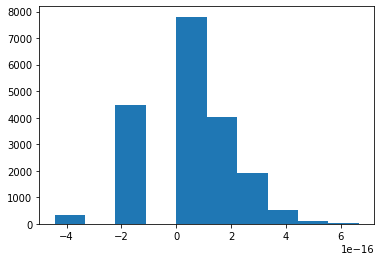

In [6]:
plt.hist(d_to_nearest_all_samples)

In [ ]:
cluster_HAC(dis_samples, cutoff)